# <center><span style="color:darkblue">Quick start with PostgreSQL for Network Data Construction, Networkx for Analysis of Global Network Statistics, and Network Visualization </span><center> 

Juan Estrada and Leonardo Sanchez-Aragon

## <span style="color:darkblue">1. Quick start with PostgreSQL and SQL Language </span>

<font size="4"> 

-  A database is a program which helps store data and provides functionality for **adding, modifying, and querying** that data.

-  One of the most popular types of databases is the **relational database**. It stores each kind of data in a table where rows represent an item and columns represent properties of those items.

-  Relational databases are particularly useful to form relationships between tables. This form of storage is more efficient than having to repeat rows to store all the information of related tables. See for example *authors_char, articles_char and articles_authors* tables.

In [1]:
%load_ext tikzmagic

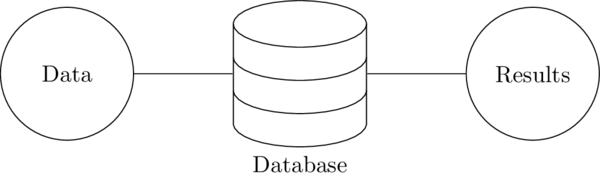

In [2]:
%%tikz -s 600,600
\makeatletter
\tikzset{
    database/.style={
        path picture={
            \draw (0, 1.5*\database@segmentheight) circle [x radius=\database@radius,y radius=\database@aspectratio*\database@radius];
            \draw (-\database@radius, 0.5*\database@segmentheight) arc [start angle=180,end angle=360,x radius=\database@radius, y radius=\database@aspectratio*\database@radius];
            \draw (-\database@radius,-0.5*\database@segmentheight) arc [start angle=180,end angle=360,x radius=\database@radius, y radius=\database@aspectratio*\database@radius];
            \draw (-\database@radius,1.5*\database@segmentheight) -- ++(0,-3*\database@segmentheight) arc [start angle=180,end angle=360,x radius=\database@radius, y radius=\database@aspectratio*\database@radius] -- ++(0,3*\database@segmentheight);
        },
        minimum width=2*\database@radius + \pgflinewidth,
        minimum height=3*\database@segmentheight + 2*\database@aspectratio*\database@radius + \pgflinewidth,
    },
    database segment height/.store in=\database@segmentheight,
    database radius/.store in=\database@radius,
    database aspect ratio/.store in=\database@aspectratio,
    database segment height=0.1cm,
    database radius=0.25cm,
    database aspect ratio=0.35,
}
\makeatother

\node[database,label=below:Database, database radius=1cm,database segment height=0.5cm] (database){};

\node[circle, draw, text centered, font = \normalsize, align = center, minimum size=2cm] (dta) at (0:-3.5) {Data};
\path [draw] (database) to (dta);

\node[circle, draw, text centered, font = \normalsize, align = center, minimum size=2cm] (res) at (0:3.5) {Results};
\path [draw] (database) to (res);

![alt text](publications_data.png "Title")

<font size="4"> 

SQL is a language design entirely for accessing databases and it allows to:


- Create tables.

- Update and change data.

- Query the database.

## <span style="color:darkblue">1.1 PostgreSQL </span>

<font size="4"> 

- Relational database management system (RDBMS).

- One of the most popular RDBMS and increasing popularity during the last 6 years.

- Open-source software in active development for over 30 years.

- It has reputation for being a reliable, robust and secure data platform.

### <span style="color:darkblue">RDBMS Advantages </span>

<font size="4"> 

- Creates a protective wrapper around your data and gives the ability to control modification.

- Secures your data by enforcing access permission (particularly good for join projects).

- Manages system performance which helps enter data and retrieve information in the most efficient ways possible.

### <span style="color:darkblue">Server/Client Model </span>

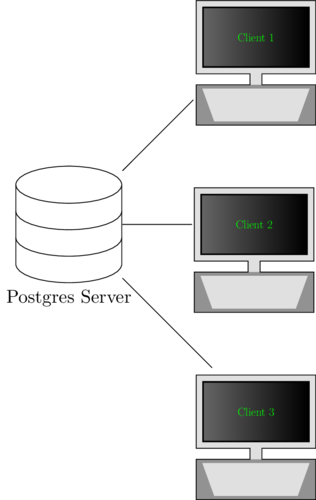

In [3]:
%%tikz -s 500,500 -l fit

\tikzset{
  comp/.style = {
    minimum width  = 8cm,
    minimum height = 4.5cm,
    text width     = 8cm,
    inner sep      = 0pt,
    text           = green,
    align          = center,
    font           = \Huge,
    transform shape,
    thick
  },
  monitor/.style = {draw = none, xscale = 18/16, yscale = 11/9},
  display/.style = {shading = axis, left color = black!60, right color = black},
  ut/.style      = {fill = gray}
}
\tikzset{
  computer/.pic = {
    % screen (with border)
    \node(-m) [comp, pic actions, monitor]
      {\phantom{\parbox{\linewidth}{\tikzpictext}}};
    % display (without border)
    \node[comp, pic actions, display] {\tikzpictext};
    \begin{scope}[x = (-m.east), y = (-m.north)]
      % filling the lower part
      \path[pic actions, draw = none]
        ([yshift=2\pgflinewidth]-0.1,-1) -- (-0.1,-1.3) -- (-1,-1.3) --
        (-1,-2.4) -- (1,-2.4) -- (1,-1.3) -- (0.1,-1.3) --
        ([yshift=2\pgflinewidth]0.1,-1);
      % filling the border of the lower part
      \path[ut]
        (-1,-2.4) rectangle (1,-1.3)
        (-0.9,-1.4) -- (-0.7,-2.3) -- (0.7,-2.3) -- (0.9,-1.4) -- cycle;
      % drawing the frame of the whole computer
      \path[pic actions, fill = none]
        (-1,1) -- (-1,-1) -- (-0.1,-1) -- (-0.1,-1.3) -- (-1,-1.3) --
        (-1,-2.4) coordinate(sw)coordinate[pos=0.5] (-b west) --
        (1,-2.4) -- (1,-1.3) coordinate[pos=0.5] (-b east) --
        (0.1,-1.3) -- (0.1,-1) -- (1,-1) -- (1,1) -- cycle;
      % node around the whole computer
      \node(-c) [fit = (sw)(-m.north east), inner sep = 0pt] {};
    \end{scope}
  }
}

\makeatletter
\tikzset{
    database/.style={
        path picture={
            \draw (0, 1.5*\database@segmentheight) circle [x radius=\database@radius,y radius=\database@aspectratio*\database@radius];
            \draw (-\database@radius, 0.5*\database@segmentheight) arc [start angle=180,end angle=360,x radius=\database@radius, y radius=\database@aspectratio*\database@radius];
            \draw (-\database@radius,-0.5*\database@segmentheight) arc [start angle=180,end angle=360,x radius=\database@radius, y radius=\database@aspectratio*\database@radius];
            \draw (-\database@radius,1.5*\database@segmentheight) -- ++(0,-3*\database@segmentheight) arc [start angle=180,end angle=360,x radius=\database@radius, y radius=\database@aspectratio*\database@radius] -- ++(0,3*\database@segmentheight);
        },
        minimum width=2*\database@radius + \pgflinewidth,
        minimum height=3*\database@segmentheight + 2*\database@aspectratio*\database@radius + \pgflinewidth,
    },
    database segment height/.store in=\database@segmentheight,
    database radius/.store in=\database@radius,
    database aspect ratio/.store in=\database@aspectratio,
    database segment height=0.1cm,
    database radius=0.25cm,
    database aspect ratio=0.35,
}
\makeatother

\node[database,label=below:Postgres Server, database radius=1cm,database segment height=0.5cm] (database){};
\pic[draw,fill = gray!30, scale = 0.25, pic text = {Client 2}](pc2) at (0:3.5){computer};
\node[circle](client2) at (0:2.5){};
\path [draw] (database) to (client2);

\pic[draw,fill = gray!30, scale = 0.25, pic text = {Client 1}](pc1) at (45:5){computer};
\node[circle](client1) at (45:3.5){};
\path [draw] (database) to (client1);

\pic[draw,fill = gray!30, scale = 0.25, pic text = {Client 3}](pc1) at (-45:5){computer};
\node[circle](client3) at (-45:4){};
\path [draw] (database) to (client3);

<font size="4"> 

- In our case, we will be using an Amazon Web Service (AWS) Postgres Relational Database Service (RDS).

- I will follow the steps of how to connect to the Postgres server from my local machine.

- Once the connection is established, I will show how to create the relational database containing the data that I will be using to construct the networks.

- The following process assumes that you have installed an interface client in your local machine, and you have already created an AWS Postgres server.

- You can go back to presentation 2 for more information about cloud computing and how to set up the AWS Postgres server.

- I will be using the graphical user interface called pgAdmin 4, here is a tutorial to install Postgres in your local machine https://www.postgresqltutorial.com/install-postgresql/ (it includes instructions for Windows, Linux and macOS).

### <span style="color:darkblue">Process to Connect AWS Postgres Server to Local pgAdmin 4 </span>

<font size="4"> 

1. Go to the AWS instance containing the Postgres server and copy the Endpoint where you will be connecting to.

2. In your pdAdmin 4 click on servers and then Add New Server.

3. A new window asking for the server information will pop up. In the name section, you can use any name you want for the new AWS server.

4. Click on to the connection page and in the Host name/address paste the Endpoint that you copied from the AWS instance. If the Endpoint includes the port at the end after a colon, erase it and write the port number in the Port space.

5. Input the username and password that were created during the server set up process.


### <span style="color:darkblue">Create the Database in the AWS Server </span>

<font size="4"> 

- To create the database and the tables inside, we will be using Structure Query Language (SQL).

- The command to create the database is simple:

<font size="3"> 

``` sql
    CREATE DATABASE name
      [ [ WITH ] [ OWNER [=] user_name ]
            [ TEMPLATE [=] template ]
            [ ENCODING [=] encoding ]
            [ LC_COLLATE [=] lc_collate ]
            [ LC_CTYPE [=] lc_ctype ]
            [ TABLESPACE [=] tablespace ]
            [ CONNECTION LIMIT [=] connlimit ] ]
```

<font size="4"> 

- I will use all the default options to create the database that we will be using in this course:

<font size="3"> 

```sql
    CREATE DATABASE publications
```

- The database is created and it comes with the default schemas ```public```, you can use that schema, change its name, or create different schemas for different parts of the database. For this example, I will change the Schema name for *table*.

### <span style="color:darkblue">Create Tables in the Publications Database </span>

<font size="4"> 

The first step in process of inputting data into a database is to create a table. You can create different tables depending on the structure of the data that you are using. In this case, we provided you with the data structures and the tables' information in CSV format. We have 5 tables that are structured as illustrated in the **Entry Relationship Diagram** presented before. Therefore, we want the structure of the tables in the publications database to reflect the same structure.

The 5 required tables can be constructed using the following SQL commands:

<font size="4"> 

**1) Table with the relations between articles and authors:**

<font size="3"> 

``` sql
        CREATE TABLE public.articles_authors
        (
            articles_authors_id integer NOT NULL,
            article integer NOT NULL,
            year integer NOT NULL,
            author integer NOT NULL,
            editor_incharge boolean NOT NULL,
            PRIMARY KEY (articles_authors_id)
        );
```

<font size="4"> 

**2) Table with the characteristics of the articles (such as number of pages, journal, number of citations, etc.):**

<font size="3"> 

``` sql
        CREATE TABLE public.articles_char
        (
            articles_char_id integer NOT NULL,
            article integer NOT NULL,
            citation8 integer NOT NULL,
            jelcode1 character(4),
            jelcode2 character(4),
            jelcode3 character(4),
            jelcode4 character(4),
            jelcode5 character(4),
            jelcode6 character(4),
            jelcode7 character(4),
            keywords character(240),
            "references" character(8910),
            n_references integer NOT NULL,
            n_authors integer NOT NULL,
            title character(210) NOT NULL,
            journal character(35) NOT NULL,
            year integer NOT NULL,
            issue integer NOT NULL,
            start_page integer NOT NULL,
            end_page integer NOT NULL,
            abstract_scopus character(2030),
            scival_scopus character(100),
            pro_percentil_scopus numeric,
            view_ref_scopus integer,
            cit_scopus integer,
            cit_impact_scopus numeric,
            cit_by_scopus integer,
            PRIMARY KEY (articles_char_id)
        );
```

<font size="4"> 

**3) Table with the relations between articles and their editors in charge:**

<font size="3"> 

```sql
        CREATE TABLE public.articles_editors
        (
            articles_editors_id integer NOT NULL,
            article integer NOT NULL,
            year integer NOT NULL,
            term integer NOT NULL,
            incharge boolean NOT NULL,
            editor_authorid integer,
            PRIMARY KEY (articles_editors_id)
        );
```

<font size="4"> 

**4) Table with the characteristics of the authors:**

<font size="3"> 

```sql
        CREATE TABLE public.authors_char
        (
            authors_char_id integer NOT NULL,
            author integer NOT NULL,
            male integer,
            phd_inst character(35),
            phd_year integer,
            jel1_author character(1),
            jel2_author character(1),
            editor boolean NOT NULL,
            PRIMARY KEY (authors_char_id)
        );
```

<font size="4"> 

**5) Table with the job positions of the authors each year after they graduate from grad school:**

<font size="3"> 

```sql
        CREATE TABLE public.authors_jobs
        (
            authors_jobs_id integer NOT NULL,
            author integer NOT NULL,
            year integer,
            faculty character(80),
            faculty_position character(25),
            PRIMARY KEY (authors_jobs_id)
        );
```





### <span style="color:darkblue">Import Information From the Provided CSV Files </span>

<font size="4"> 

- Now that the tables are created inside the database, it is time to fill up the information for each table. To do that, I use the graphical user interface.

- For each table, open the table's option by right clicking on it. Then, select Import/Export... Select Import and find the table that you want in your local machine.

- Note that the CSV table must have the same name as the SQL table, it must have the same type for each column, and the strings must have a maximum number of characters given by the ```character(n)```.

## <span style="color:darkblue">1.2 SQL Language </span>

<font size="4"> 

- The SQL language is used to perform actions such as Create, Retrieve, Update and Delete on relational databases.

- For that purpose, we use Queries. A Query is a set of instruction given to the database management system, which tells the Relational Database Management System (RDBMS) what information you would like to get from the database.

- A SQL statement can be broken into three major component:

        1. The SQL operation (SELECT)
        2. The target (FROM)
        3. The condition (WHERE, HAVING, etc)

    

- Only the SQL operation and target are required, the condition is optional. The most common operation in SQL, the query, makes use of the declarative SELECT statement. SELECT retrieves data from one or more tables, or expressions. 

### <span style="color:darkblue">Query for Coauthors' Edges Data </span> 

<font size="3"> 

```sql
        SELECT aa1.author AS source, aa2.author AS target
        FROM tables.articles_authors aa1
        LEFT JOIN tables.articles_authors AS aa2
        USING(article)
        WHERE aa1.year <= 2000 AND aa1.article = aa1.article AND aa1.author != aa2.author
        ORDER BY source, target;
```

### <span style="color:darkblue">Query for Advisor Edges Data </span> 

```sql
        WITH s AS (
        SELECT author, phd_inst, phd_year
        FROM tables.authors_char
        WHERE phd_inst IS NOT NULL AND phd_year IS NOT NULL)

        SELECT s1.author AS source, s2.author AS targuet
        --INTO adjacency_matrices.samephd
        FROM s AS s1
        LEFT JOIN s AS s2
        USING (phd_inst)
        WHERE s1.author != s2.author 
        AND s1.phd_year > s2.phd_year - 4 
        AND s1.phd_year < s2.phd_year + 4
        AND s1.author IN (SELECT DISTINCT author FROM tables.articles_authors WHERE year <= 2000)
        AND s2.author IN (SELECT DISTINCT author FROM tables.articles_authors WHERE year <= 2000)
        ORDER BY s1.author, s2.author;
```

### <span style="color:darkblue">Creating Edges Data Using ```psycopg2``` in Python </span> 

In [4]:
import psycopg2
import pandas.io.sql as sqlio
import networkx as nx
from scipy import sparse

In [5]:
def create_graph(net, year, articles, con):
    
    coauthors_query = ("SELECT aa1.author AS source, aa2.author AS target \
                       FROM tables.articles_authors aa1 \
                       LEFT JOIN tables.articles_authors AS aa2 \
                       USING(article) \
                       WHERE aa1.year <= '{}' AND aa1.article = aa1.article AND aa1.author != aa2.author \
                       ORDER BY source, target").format(year)

    samephd_query = ("WITH s AS (SELECT author, phd_inst, phd_year \
                       FROM tables.authors_char \
                       WHERE phd_inst IS NOT NULL AND phd_year IS NOT NULL) \
                       SELECT s1.author AS source, s2.author AS target \
                       FROM s AS s1 LEFT JOIN s AS s2 \
                       USING (phd_inst) \
                       WHERE s1.author != s2.author AND s1.phd_year > s2.phd_year - 4 AND s1.phd_year < s2.phd_year + 4 \
                       AND s1.author IN (SELECT DISTINCT author FROM tables.articles_authors WHERE year <= '{}') \
                       AND s2.author IN (SELECT DISTINCT author FROM tables.articles_authors WHERE year <= '{}') \
                       ORDER BY s1.author, s2.author").format(year, year)

                        
    ph = "author" if articles == False else "article"
                
    nodes_query = ("SELECT DISTINCT " + ph + "\
                  FROM tables.articles_authors \
                  WHERE year <= '{}' \
                  ORDER BY "+ ph + ";").format(year)
    
    if net == 'coauthor':
        query_type = coauthors_query
    else:
        query_type = samephd_query
    
    articles_query = ("WITH s AS("+ query_type + ") \
                    SELECT DISTINCT a1.article AS source, a2.article AS target \
                    FROM s \
                    LEFT JOIN tables.articles_authors AS a1 \
                    ON s.source = a1.author \
                    LEFT JOIN tables.articles_authors AS a2 \
                    ON s.target = a2.author \
                    WHERE a1.article != a2.article \
                    AND a1.year <= '{}' AND a2.year <= '{}' \
                    ORDER BY a1.article, a2.article;").format(year, year)

    edges_ca = sqlio.read_sql_query(query_type+";", con) if articles == False else sqlio.read_sql_query(articles_query, con)
    nodes_ca = sqlio.read_sql_query(nodes_query, con)
    
    return [nodes_ca, edges_ca] 

In [6]:
con = psycopg2.connect(
    host = 'localhost',
    database = 'publications',
    user = 'postgres',
    password  = '1nf1n1t0')

results = create_graph('coauthor', 2000, False, con)
nodes = results[0]
edges = results[1]
con.close()

In [7]:
edges.head()

,source,target
0,3,825
1,5,554
2,11,392
3,17,107
4,17,768


## <span style="color:darkblue">2. Basic Terms and Notation in Networks Using ```networkx``` </span>

<font size="4"> 

*Disclaimer:* Many of the concept in this notes are based on a presentation by Brian Graham in Annweiler-Germany 2019.


NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. The basic components of the library are:

- **Graph Creation:** this includes different ways to generate non-random (trees, cycles, full, etc) or random (Erdos_Renyi, Newman-Watts-Strogatz, etc) graphs.
- **Algorithms:** includes functions to calculate statistics of the network such as centrality, clustering, components, communities, etc.
- **Reading and writing graphs:** read/write graphs from/to other data types such as pandas, numpy, scipy, etc.
- **Basic visualization**
- Explore more here: https://networkx.org/documentation/stable/index.html

Note that there are other packages to analyze networks that may have a better performance in terms of time to calculate commonly used algorithms. Also, different packages include different algorithms so you should take that into consideration. Here is an analysis of the performance of different network packages: https://www.timlrx.com/2019/05/05/benchmark-of-popular-graph-network-packages/#fn2

### <span style="color:darkblue">Basic Terms </span>

<font size="4"> 

An undirected graph $G(N,E)$ consists of a set of nodes $N={1,…,N}$ and a a list of unordered pairs of nodes called edges $E=\{\{i,j\},\{k,l\},\dots\}$ for all $i,j,k,l \in N$

### <span style="color:darkblue">Reading the data into Networkx </span>

In [8]:
import numpy as np
G=nx.Graph()
G.add_nodes_from(np.squeeze(nodes.values).tolist())

tuples = [tuple(x) for x in edges.to_numpy()]
G.add_edges_from(tuples)

In [9]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 376
Number of edges: 225
Average degree:   1.1968


In [10]:
list(G.nodes())[0:19]

[3, 5, 11, 17, 23, 24, 25, 29, 31, 32, 52, 53, 54, 66, 73, 96, 97, 103, 107]

In [11]:
list(G.edges())[0:19]

[(3, 825),
 (5, 554),
 (11, 392),
 (17, 107),
 (17, 768),
 (17, 843),
 (29, 503),
 (29, 522),
 (29, 1675),
 (31, 1843),
 (32, 1912),
 (53, 925),
 (66, 662),
 (73, 1718),
 (96, 868),
 (103, 1762),
 (107, 768),
 (107, 843),
 (116, 1432)]

### <span style="color:darkblue">Network Visualization Using Python </span>

The following visualization will be created the ```plotly``` Python library. It is an interactive plotting library that support interactive web-based visualizations built on top of the JavaScript library plotly.js. This type of network visualization is particularly good when it is used along with Jupyter Notebooks to be able to display the stand alone HTML files.

For the next visualization and the study of the network statistics, I will remove the isolated nodes (this is optional but the network graph looks more clear this way).

In [12]:
G.remove_nodes_from(list(nx.isolates(G)))

In [13]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 303
Number of edges: 225
Average degree:   1.4851


<font size="4"> 

***Step 1:*** add the position attribute to the nodes using ```networkx```. To create a position, I will use the random layout of the ```netwokrx``` package.

Other options for layouts:

- circular_layout

- shell_layout

- spring_layout

- spectral_layout

In [14]:
pos = nx.spring_layout(G, scale = 20, iterations = 15)
nx.set_node_attributes(G, pos, 'pos')

<font size="4"> 

**Step 2:** Use the positions created in the previous step along with the ```Scatter``` function of ```plotly``` to create the objects with the edges and nodes positioned in a 2 dimensional space. There are other options that are used from the ```Scatter``` function:

- line: create lines of with 0.5 and color gray ('#888')

- mode: draws lines for the edges and markers for the nodes

- marker: defines nodes characteristics such as color, color scale, title of the color scale and position

Some options for colors are:

- 'Greys'
- 'YlGnBu'
- 'Greens'
- 'YlOrRd'
- 'Bluered'
- 'RdBu'
- 'Reds'
- 'Blues'
- 'Picnic'
- 'Rainbow'
- 'Portland'
- 'Jet'
- 'Hot'
- 'Blackbody'
- 'Earth'
- 'Electric'
- 'Viridis'

In [15]:
import plotly.graph_objects as go

# Add edges as disconnected lines in 2d space

edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

<font size="4"> 

**Step 3:** create the scale that the graph will use. In this case, we will be working with the number of connections.

In [16]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [17]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Coauthos Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Created by Juan Estrada",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

### <span style="color:darkblue">Adjacency Matrix </span>

<font size="4"> 

A graph is conveniently represented by its adjacency matrix $W=[Wij]$ where

$$W_{ij} = \begin{cases}
  1 & \text{if } \{i,j\} \in E \\
  0 & \text{otherwise}
\end{cases}$$

In [18]:
nx.to_numpy_matrix(G)

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.]])

## <span style="color:darkblue">3. Global Network Statistics </span>

### <span style="color:darkblue">Degree Sequence - Degree Distribution </span>

<font size="4"> 

Some classical research take the degree distribution as the primary object of interest, and some datasets report agent degrees with no other network information.

- The total number of links belonging to agent $i$ , or her degree is $W_{i+} = \sum_{j} W_{ij}$

- The degree sequence of a network is $W_{+} = (W_{1+},…,W_{N+})^{⊤}$

- The degree distribution gives the frequency of each possible agent-level degree count $\{0,1,\dots,N\}$  in the network.

In [19]:
list(G.degree())[0:20]

[(3, 1),
 (5, 1),
 (11, 1),
 (17, 3),
 (29, 3),
 (31, 1),
 (32, 1),
 (53, 1),
 (66, 1),
 (73, 1),
 (96, 1),
 (103, 1),
 (107, 3),
 (116, 1),
 (132, 1),
 (148, 2),
 (153, 2),
 (155, 2),
 (156, 1),
 (160, 2)]

In [20]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

<BarContainer object of 4 artists>

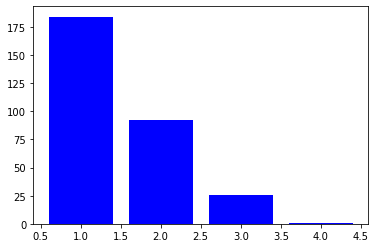

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

### <span style="color:darkblue">Degree Sequence - Degree Distribution </span>

<font size="4">

- Dyads are either link or unliked. The density of a network equals the frequency with which any randomly drawn dyad is linked:

$$\hat{\rho}_{N}={N \choose 2}^{-1} \sum_{i=1}^{N}\sum_{j<i} W_{ij}$$

- Average degree:

$$\hat{\lambda}_{N} = (N-1)\hat{\rho}_{N}$$

- Low density and skewed degree distributions (with fat tails) are common features of real world social networks.

In [22]:
print('The Density of the Coauthors Network is '+str(round(nx.density(G), 3)))

The Density of the Coauthors Network is 0.005


In [23]:
print('The Average Degree of the Coauthors Network is '+ str(round(sum(degree_sequence)/len(degree_sequence),3)))

The Average Degree of the Coauthors Network is 1.485


### <span style="color:darkblue">Degree Sequence - Degree Distribution </span>

<font size="4">

- **Paths of length two:** if $i$ and $j$ share the common friend $k$, then a length two path from $i$ to $j$ is given by $i \rightarrow k \rightarrow j$. The elements $ij$ th of $W^{2}$ gives the number of paths of length two from agent $i$ to agent $j$.

- **Paths of length three:** The elements $ij$ th of $W^{3}$ gives the number of paths of length two from agent  $i$ to agent $j$.

- If both $i$ and $j$ are connected to $k$ as well as to each other, then the $i,j,k$ triad is transitive (**triangle**).

- The $i$ th element of $W^{3}$ gives the number of triangles to which $i$ belongs (with $i \rightarrow j \rightarrow k$ and $i \rightarrow k \rightarrow j$ counted separately).

- **Paths of length $k$:** The elements $ij$ th of $W^{k}$ gives the number of paths of length two from agent $i$ to agent $j$.

In [24]:
list(nx.all_simple_paths(G, 17, 107))

[[17, 107],
 [17, 768, 107],
 [17, 768, 843, 107],
 [17, 843, 107],
 [17, 843, 768, 107]]

<font size="4">

- **Distance:** The distance between agents $i$ and $j$ equals the minimum length path connecting them:

$$M_{ij} = \min_{k}\{k: W_{ij}^{(k)}>0\}$$

- If the network consists of a single, giant, connected component, we can compute average path length as:

$$\bar{M} = {N \choose 2}^{-1} \sum_{i=1}^{N}\sum_{j<i} M_{ij}$$

In [25]:
list(nx.shortest_path_length(G))[0:4]

[(3, {3: 0, 825: 1, 589: 2}),
 (5, {5: 0, 554: 1}),
 (11, {11: 0, 392: 1}),
 (17, {17: 0, 768: 1, 843: 1, 107: 1})]

In [26]:
def gc_average_shortest_path_length(G, isolated = True):
    
    G.remove_nodes_from(list(nx.isolates(G))) if isolated == True  else G
    mean_gc = []
    sizes = []
    for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
        mean_gc.append(nx.average_shortest_path_length(C))
        sizes.append(nx.number_of_nodes(C))
        
    return np.sum(np.multiply(mean_gc,sizes))/np.sum(sizes)

round(gc_average_shortest_path_length(G),3)

1.083

<font size="4">

- **Diameter:** largest distance between two agents in the network.

In [27]:
diameter = []
for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
        diameter.append(nx.diameter(C))

max(diameter)

4

### <span style="color:darkblue">Small World Problem </span>

Around 0.5% of nodes are directly connected in the coauthors network but the diameter is only 4. why do we see sparsity and low diameter together? Milgram (1967).

### <span style="color:darkblue">Small World Problem </span>

The transitivity index (TI) is given by

$$ TI = 3 \times \frac{\text{triangles}}{\text{triads}}$$

In random graphs TI should be close to network density. However, **in practice TI often substantially exceeds network density**, in other words links are more clustered than would be expected under the homogenous random graph null.

In [28]:
round(nx.transitivity(G),3)

0.852

In [29]:
print('The TI in the Coauthors network ('+str(round(nx.transitivity(G),3))+') substantially exceeds the network density ('+str(round(nx.density(G), 3))+')')

The TI in the Coauthors network (0.852) substantially exceeds the network density (0.005)


# <span style="color:darkblue"> Multilayer Network Statistics and Visualization</span>

*Disclaimer:* Many of the concept in this notes are based on a presentation by Brian Graham in Annweiler-Germany 2019.

## <span style="color:darkblue">1. Monolayer </span> 

### <span style="color:darkblue">1.1 Important Nodes </span> 

<font size="4"> 

- The objective is to learn methods to identify nodes that are important in a network. 
    
    
- There are different statistics that can provide information about the importance of a node from different perspectives.
    
    
- Finding important nodes can help to answer questions such as:
    
    
- Removal of what node would reduce disease transmission the most?
    
    
- What nodes should companies target to incentivize technology adoption?
    
    
- Can sectoral idiosyncratic shocks lead to aggregate fluctuations?
    
    
- How do agent-specific shocks percolate through a network to generate social multipliers?
    

In [14]:
path = 'D:/Users/JuanEstrada/OneDrive - Emory University/EmoryUniversity/Courses/empirical_multilayer_cloud/data' # Change this path for the location of empirical_multilayer_cloud/data in your local machine

import psycopg2
import pandas.io.sql as sqlio
import networkx as nx
from scipy import sparse
import itertools as it
import pandas as pd

In [2]:
def create_graph(net, year, articles, con):
    
    coauthors_query = ("SELECT aa1.author AS source, aa2.author AS target \
                       FROM tables.articles_authors aa1 \
                       LEFT JOIN tables.articles_authors AS aa2 \
                       USING(article) \
                       WHERE aa1.year <= '{}' AND aa1.article = aa1.article AND aa1.author != aa2.author \
                       ORDER BY source, target").format(year)

    samephd_query = ("WITH s AS (SELECT author, phd_inst, phd_year \
                       FROM tables.authors_char \
                       WHERE phd_inst IS NOT NULL AND phd_year IS NOT NULL) \
                       SELECT s1.author AS source, s2.author AS target \
                       FROM s AS s1 LEFT JOIN s AS s2 \
                       USING (phd_inst) \
                       WHERE s1.author != s2.author AND s1.phd_year > s2.phd_year - 4 AND s1.phd_year < s2.phd_year + 4 \
                       AND s1.author IN (SELECT DISTINCT author FROM tables.articles_authors WHERE year <= '{}') \
                       AND s2.author IN (SELECT DISTINCT author FROM tables.articles_authors WHERE year <= '{}') \
                       ORDER BY s1.author, s2.author").format(year, year)
                        
    ph = "author" if articles == False else "article"
                
    nodes_query = ("SELECT DISTINCT " + ph + "\
                  FROM tables.articles_authors \
                  WHERE year <= '{}' \
                  ORDER BY "+ ph + ";").format(year)
    
    if net == 'coauthor':
        query_type = coauthors_query
    else:
        query_type = samephd_query
    
    articles_query = ("WITH s AS("+ query_type + ") \
                    SELECT DISTINCT a1.article AS source, a2.article AS target \
                    FROM s \
                    LEFT JOIN tables.articles_authors AS a1 \
                    ON s.source = a1.author \
                    LEFT JOIN tables.articles_authors AS a2 \
                    ON s.target = a2.author \
                    WHERE a1.article != a2.article \
                    AND a1.year <= '{}' AND a2.year <= '{}' \
                    ORDER BY a1.article, a2.article;").format(year, year)

    edges_ca = sqlio.read_sql_query(query_type+";", con) if articles == False else sqlio.read_sql_query(articles_query, con)
    nodes_ca = sqlio.read_sql_query(nodes_query, con)
    
    return [nodes_ca, edges_ca]   

In [3]:
con = psycopg2.connect(
    host = 'localhost',
    database = 'publications',
    user = 'postgres',
    password  = '1nf1n1t0')

results = create_graph('coauthor', 2002, False, con)
nodes = results[0]
edges = results[1]
con.close()

In [4]:
import numpy as np
G=nx.Graph()
G.add_nodes_from(np.squeeze(nodes.values).tolist())

tuples = [tuple(x) for x in edges.to_numpy()]
G.add_edges_from(tuples)
G.remove_nodes_from(list(nx.isolates(G)))

###  <span style="color:darkblue">1.2 Degree Centrality </span> 


<font size="4">
    
$$\frac{W_{i+}}{|\mathbf{W}|-1}$$
    

Where $W_{i+}=\sum_{j} W_{i j}$ is the degree of individual $i$ and $|\mathbf{W}|$ is the total number of nodes in $\mathbf{W}$.
    
    
- This measure of centrality captures the idea that nodes with more connections a more important in the network just because they are more prestigious or popular. 
    
    
- In the coauthors network, it is intuitive to think that more productive and prestigious scholars would tend to have more coauthors.
    
    
- We can also think about influencers in social network platforms, disease super spreaders, airport hubs, or important sectors in the supply chain.
    
    
- This definition can be extended to the directed graphs where you can define 
    
    
    
- In-degree: $W_{+i}=\sum_{j} W_{j i}$ (column sums of $\mathbf{W}$). **Represents:** prestige, popularity, buyers

    
- Out-degree: $W_{i+}=\sum_{j} W_{i j}$ (row sums of $\mathbf{W}$). **Represents:** extroverts, diffusers, suppliers
<font> 

In [5]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 935
Number of edges: 787
Average degree:   1.6834


In [6]:
dc = nx.degree_centrality(G)

In [7]:
list(it.islice(dc.items(),5))

[(3, 0.0010706638115631692),
 (5, 0.007494646680942184),
 (8, 0.0010706638115631692),
 (11, 0.0021413276231263384),
 (14, 0.0010706638115631692)]

In [8]:
max_dc = max(dc.values())
max_dck = [x for x, y in dc.items() if y == max_dc]

In [9]:
print('The maximum degree centrality is '+str(round(max_dc,2))+' corresponding to nodes '+str(max_dck))

The maximum degree centrality is 0.01 corresponding to nodes [29, 1965]


In [10]:
degree = dict(G.degree())
max_d = max(degree.values())
max_dn = [x for x, y in degree.items() if y == max_d]

In [11]:
print('The maximum degree in the network is '+str(max_d))

The maximum degree in the network is 8


<font size="4">

⚠️**Empirical Fining:**
    
    
- Authors 29 and 1965 are connected with 8 other scholars each, which as a fraction of a total of 1088 nodes, represents a degree centrality of approximately 0.01. We can access the information of the authors and potentially find out who they are.
    
    
- From the information it is possible to infer that the scholar represented by the numbers 29 and 1963 are <font color="darkgreen">Alberto Alesina</font> and <font color = "darkgreen">Thomas M. Humphrey</font> respectively.

<font> 

In [15]:
authors_char = pd.read_csv(path + '/sql/authors_char.csv')

In [16]:
authors_char[(authors_char.author == max_dck[0]) | (authors_char.author == max_dck[1])]

,authors_char_id,author,male,phd_inst,phd_year,jel1_author,jel2_author,editor
28,29,29,1,HARVARD,1986.0,H,O,1
1962,1963,1965,1,TULANE,1970.0,D,G,0


<font size="4">
    
**Limitations:**
    
    
- This definition does not consider indirect connections.
    
    
- Imagine scholars 29 and 1965 who have 8 connections each. But let's say that every neighbor of node 29 has only 1 connection, while the neighbors of 1965 have 8 connections each.
    
    
- Scholar 29 would have **8 direct and 8 indirect** connections while 1965 would have **8 direct and 64 indirect** connections. 
    
    
- What node is then more important?
    
    
<font>

###  <span style="color:darkblue">1.3 Eigenvalue Centrality </span> 

<font size="4">

- Proposed by Bonacich (1972) and Katz (1953).
    

- Recursively computes the centrality for a node based on the centrality of its neighbors.

    
    
$$\begin{array}{l}
c_{i}^{\mathrm{EC}}(\mathbf{W}, \phi)=\phi \sum_{j} c_{j}^{\mathrm{EC}}(\mathbf{W}, \phi) W_{j i} \\
\mathbf{c}^{\mathrm{EC}}(\mathbf{W}, \phi)=\phi \mathbf{c}^{\mathrm{EC}}(\mathbf{W}, \phi) \mathbf{W}
\end{array}
$$


    
- Where $c_{i}^{\mathrm{EC}}$ is the eigenvalue centrality of individual $i$ and $\mathbf{c}^{\mathrm{EC}}$ is a $n \times 1$ vector of eigenvalue centrality.
    
    
- The eigenvalue centrality is defined for $\phi=1 / \lambda_{max}$ where $\lambda_{max}$ is the maximum eigenvalue of $\mathbf{W}$, which guarantees a solution of $\mathrm{c}^{\mathrm{EC}}(\mathbf{W}, \phi)\left[\frac{1}{\phi} I_{N}-\mathrm{D}\right]=0$  given by the left eigenvector associated with the largest eigenvalue of $\mathbf{W}$.
    
    
- If the normalization is done by $\mathbf{D} = \operatorname{diag}\left\{\max \left(1, W_{1+}\right), \ldots, \max \left(1, W_{N+}\right)\right\}^{-1} \times \mathrm{W}$, then $\mathbf{D}$ is row stochastic and the eigenvector centrality correspond to a stationary vector of a Markov chain.
    
    


In [17]:
ec = nx.eigenvector_centrality(G)

In [18]:
list(it.islice(ec.items(),5))

[(3, 0.010379046094836126),
 (5, 2.2643519485776037e-06),
 (8, 4.932634861780327e-35),
 (11, 4.020577458207517e-21),
 (14, 4.932634861780327e-35)]

In [19]:
max_ec = max(ec.values())
max_eck = [x for x, y in ec.items() if y == max_ec]

In [20]:
print('The maximum degree centrality is '+str(round(max_ec,4))+' corresponding to nodes '+str(max_eck))

The maximum degree centrality is 0.4817 corresponding to nodes [1000]


In [21]:
print('This node has '+str(degree[1000])+' connections and '+str(round(dc[1000],2))+' degree centrlity')

This node has 7 connections and 0.01 degree centrlity


In [22]:
print('Eigenvalue centrality for nodes 29 and 1965 '+str(round(ec[29],4)) +' and '+str(round(ec[1965],4)))

Eigenvalue centrality for nodes 29 and 1965 0.0002 and 0.0015


In [23]:
authors_char[(authors_char.author == max_eck[0])]

,authors_char_id,author,male,phd_inst,phd_year,jel1_author,jel2_author,editor
999,1000,1000,1,PRINCETON,1989.0,J,C,0


In [24]:
ec_df = pd.DataFrame(list(ec.items()),columns = ['scholar','ec']) 
ec_df.sort_values(by = ['ec'], ascending=False).head()[0:2]

,scholar,ec
454,1000,0.481737
599,1334,0.386700


<font size="4">

⚠️**Empirical Fining:**

Based on the Eigenvalue Centrality, scholars 1000 and 1332 are the most important in the network. The characteristics of this scholar together with his publication record, make possible to infer that <font color="darkgreen">Joshua Angrist</font> is the author with the highest eigenvalue centrality, followed by <font color="darkgreen">Michael Kremer</font>.
    
<font>

###  <span style="color:darkblue">1.4 Katz Centrality and the Social Multiplier </span> 

<font size="4">

- Computes the centrality for a node based on the centrality of its neighbors. It is a generalization of the eigenvector centrality. 
    

$$c_{i}^{K}(\alpha,\beta, \mathbf{W})=\alpha + \beta \sum_{j \neq i} W_{i j} c_{j}^{K}\text{.}$$
    
    
- The parameter $\alpha$ controls the initial centrality and $\beta<1/\lambda_{\text{max}}$.

    
- The relative influence of a node is given by the number of the immediate neighbors (first degree nodes) and also all other nodes in the network that connect to the node under consideration through these immediate neighbors.
    
    
- The parameter $\beta$ penalizes the distant connections. In matrix form the previous equation can be written as:
    
    
$$\mathbf{c}^{K}(\alpha,\beta, \mathbf{W})=\alpha\iota_{n}^{\prime}(\mathbf{I}-\beta\mathbf{W})^{-1}\text{.}$$
    
    

- Where $(\mathbf{I}-\beta\mathbf{W})^{-1} = \sum_{k=0}^{\infty} \beta^{k} \mathbf{W}^{k}$ for $\beta<1/\lambda_{\text{max}}$ represents the attenuated effects of distant nodes. 
    
    
    
**Relation with the Social Multiplier of a Quadratic complementarity Game (Jackson and Zenou, 2015).**

    
- Let $y_{i}$ be a continuously-valued action chosen by agent $i = 1, \dots, n$, where $\mathbf{y}$ is the associated vector of actions.
    
    
- Agents are connected by a row normalized adjacency matrix $\mathbf{D}$, so that $\mathbf{D}_{i}\mathbf{y} = \sum_{j \neq i} G_{i j} y_{j}$ represent the average actions of individual $i$'s connections 
  
    
- The payoff function includes complementarities: $u_{i}(\mathbf{y} ; \mathbf{W}) = \left(\alpha_{0}+U_{i}\right) y_{i}-\frac{1}{2} y_{i}^{2}+\beta_{0}\mathbf{D}_{i}\mathbf{y} y_{i}$

    
- Where $U_{i}$ represents heterogeneity in payoffs. The best response function is given by
   
    
$$y_{i}=\alpha_{0}+\beta_{0} \sum_{j \neq i} D_{i j} y_{j}+U_{i}$$

    
    
- Which is equivalent to the definition of the Katz centrality plus a random component $U_{i}$. The matrix form is given by:
    
    
$$\mathbf{Y}=\alpha_{0}\left(I_{N}-\beta_{0} \mathbf{D}\right)^{-1} \iota_{N}+\left(I_{N}-\beta_{0} \mathbf{D}\right)^{-1} \mathrm{U}$$
    
- So that a policy increasing agent $i$ value of $U_{i}$ will be amplified by a factor corresponding to the $i$th row of $\iota\left(I_{N}-\beta_{0} \mathbf{D}\right)^{-1}$ on the equilibrium action vector.
    
    
- The social multiplier is heterogeneous across agents, and depends on their centrality: $\mathbf{c}^{SM}(\mathbf{D}, \beta)=\iota_{n}^{\prime}\left(I_{N}-\beta \mathbf{G}\right)^{-1}$
    
    
- If the parameter $\alpha$ in the Katz centrality equals one, and it is calculated using the normalized matrix $\mathbf{D}$, then the social multiplier and the Katz centrality measures coincide. 
    

In [25]:
W = nx.to_numpy_array(G)
sum_rows = W.sum(axis=1)
D = W / sum_rows[:, np.newaxis]
Id = np.identity(D.shape[0])

In [26]:
smc_list = np.linalg.solve(Id- 0.570*D, Id).sum(axis = 0)

In [27]:
smc = {list(G.nodes)[i]: smc_list[i] for i in range(len(G))} 
max_smc = max(smc.values())
max_smck = [x for x, y in smc.items() if y == max_smc]

In [28]:
print('The maximum Social Multiplier centrality is '+str(round(max_smc,2))+' corresponding to nodes '+str(max_smck))

The maximum Social Multiplier centrality is 5.68 corresponding to nodes [29]


In [29]:
print('The Social Multiplier centrality of scholar 1000 is '+str(round(smc[1000],2))+' and for scholar 1965 it is '+str(round(smc[1965],2)))

The Social Multiplier centrality of scholar 1000 is 3.49 and for scholar 1965 it is 4.38


In [30]:
smc_df = pd.DataFrame(list(smc.items()),columns = ['scholar','smc']) 
smc_df.sort_values(by = ['smc'], ascending=False).head()[0:2]

,scholar,smc
14,29,5.680607
826,1789,4.903392


 <font size="4">

⚠️**Empirical Fining:**
    
Based on the Social Multiplier Centrality, scholars 29 and 1789 are the most important nodes in the network. As we saw, node 29 corresponds with <font color="darkgreen">Alberto Alesina</font>, while node 1789 is <font color="darkgreen">Steven D. Levitt</font>.
    
 <font size="4">

###  <span style="color:darkblue">1.5 Betweenness Centrality</span> 

<font size="4">
    
Betweenness centrality of a node $i$ is the sum of the fraction of all-pairs shortest paths that pass through v:

$$c_{BC}(i)=\sum_{s, t \in V} \frac{\sigma(s, t \mid i)}{\sigma(s, t)}$$

Where $V$ is the set of nodes, $\sigma(s, t)$ is the number of shortest $(s, t)$-paths, and $\sigma(s, t \mid i)$ is the number of those paths passing through some node $i$ other than $s$, $t$. If $s = t$, then $\sigma(s, t) = 1$, and if $i \in {s, t}$, then $\sigma(s, t|v) = 0$.
    
<font>

In [31]:
bc = nx.betweenness_centrality(G)
max_bc = max(bc.values())
max_bck = [x for x, y in bc.items() if y == max_bc]

In [32]:
print('The maximum Social Multiplier centrality is '+str(round(max_bc,4))+' corresponding to nodes '+str(max_bck))

The maximum Social Multiplier centrality is 0.001 corresponding to nodes [363]


In [33]:
bc_df = pd.DataFrame(list(bc.items()),columns = ['scholar','bc']) 
bc_df.sort_values(by = ['bc'], ascending=False).head()[0:2]

,scholar,bc
152,363,0.001010
806,1748,0.000794


<font size="4">

⚠️**Empirical Fining:**
    
In this measure the <font color="darkgreen">Daron Acemoglu</font> (node 336) leads followed by <font color="darkgreen">Simon Johnson</font> (node 1748).
    
<font>

##  <span style="color:darkblue">2. Multilayer Networks </span> 

###  <span style="color:darkblue">2.1 Basic Definitions </span> 

<font size="4">

A multilayer network is a pair $\mathcal{M}=(\mathcal{G}, \mathcal{C})$, where
    
    
- $\mathcal{G}=\left\{G_{m} ; m \in\{1, \ldots, M\}\right\}$ is a set of graphs $G_{m}=\left(V_{m}, E_{m}\right)$.
    

- Each graph $m$ is formed by a set of nodes and a set of edges represented by $V_{m}$ and $E_{m}$ respectively.


- The graphs in $\mathcal{G}$ are allowed to be directed or undirected, weighted or unweighted but are assumed to not have self cycles.
    

- Let $\mathcal{C}$ be the set of interconnections between nodes of different layers $G_m$ and $G_s$ with $m \neq s$


$$\mathcal{C}=\left\{E_{m, s} \subseteq V_{m} \times V_{s} ; m, s \in\{1, \ldots, M\}, m \neq s\right\}\text{.}$$
    

- The set of edges $E_m$ are known as **intralayer connections** and the edges in $\mathcal{C}$ are known as **Interlayer connections**.


###  <span style="color:darkblue">2.2 Network Visualization Using R using the articles networks</span> 

<font size="4">

The following visualizations use the R package ```igraph```

In [4]:
options(warn=-1)
library('igraph')
library('haven')

In [1]:
setwd('D:/Users/JuanEstrada/OneDrive - Emory University/EmoryUniversity/Courses/empirical_multilayer_cloud/data/stata') # Change this path for the location of .../data/stata in your local machine

<font size="4">

1) Import data

In [5]:
edges.co <- read_dta('edges.dta')
edges.al <- read_dta('edges0.dta')

nodes <- read_dta('articles.dta')

<font size="4">

2) Create undirected networks based on the edge lists for the coauthors (```edges```) and alumni (```edges0```)

In [6]:
coauthors <- graph_from_data_frame(d=edges.co, vertices=nodes, directed=F)
alumni <- graph_from_data_frame(d=edges.al, vertices=nodes, directed=F)

In [7]:
coauthors

IGRAPH 3fcf60e UN-- 729 1348 -- 
+ attr: name (v/c), lcitations (v/n), editor (v/n), diff_gender (v/n),
| isolated (v/n), n_pages (v/n), n_authors (v/n), n_references (v/n),
| journal (v/n), year (v/n), c_alumni (v/n), c_coauthor (v/n)
+ edges from 3fcf60e (vertex names):
 [1] 4  --472 5  --221 5  --463 5  --478 5  --665 705--5   8  --113 8  --133
 [9] 177--8   189--8   639--8   658--8   356--10  10 --527 11 --26  639--11 
[17] 13 --213 13 --428 96 --14  469--14  17 --277 17 --348 17 --414 17 --429
[25] 17 --710 18 --328 18 --581 424--19  20 --273 20 --297 20 --301 20 --426
[33] 483--20  20 --549 22 --123 22 --187 22 --190 22 --485 22 --599 22 --677
[41] 24 --572 11 --26  26 --113 26 --637 639--26  26 --658 697--26  28 --390
+ ... omitted several edges

In [8]:
alumni

IGRAPH 3fd8892 UN-- 729 17676 -- 
+ attr: name (v/c), lcitations (v/n), editor (v/n), diff_gender (v/n),
| isolated (v/n), n_pages (v/n), n_authors (v/n), n_references (v/n),
| journal (v/n), year (v/n), c_alumni (v/n), c_coauthor (v/n)
+ edges from 3fd8892 (vertex names):
 [1] 2  --482 2  --534 4  --129 4  --136 4  --407 5  --10  5  --95  5  --97 
 [9] 130--5   144--5   152--5   5  --161 5  --194 5  --301 5  --324 5  --357
[17] 5  --383 5  --416 5  --450 5  --460 5  --488 501--5   5  --525 5  --539
[25] 541--5   5  --611 647--5   5  --655 5  --703 88 --6   90 --6   92 --6  
[33] 109--6   115--6   122--6   134--6   140--6   141--6   191--6   197--6  
[41] 215--6   225--6   6  --233 266--6   277--6   279--6   290--6   6  --334
+ ... omitted several edges

<font size="4">

3) Drop isolated nodes from the coauthors and alumni networks to improve the aesthetics of the network visuals

In [9]:
isolated.co <- which(degree(coauthors)==0)
isolated.al <- which(degree(alumni)==0)

coauthors <- delete.vertices(coauthors, isolated.co)
alumni <- delete.vertices(alumni, isolated.al)

<font size="4">

4) Define different colors for each journal where the paper was publish and include appropriate layouts

In [10]:
colors <- c("tomato", "darkblue", "chartreuse3", "gold")
V(coauthors)$color <- colors[V(coauthors)$journal]
V(alumni)$color <- colors[V(alumni)$journal]

In [11]:
l <- layout_with_fr(alumni)
l <- norm_coords(l, ymin=-1, ymax=1, xmin=-1, xmax=1)

<font size="4">

5) Create a side-by-side plot with the two complete networks dividing nodes by journal

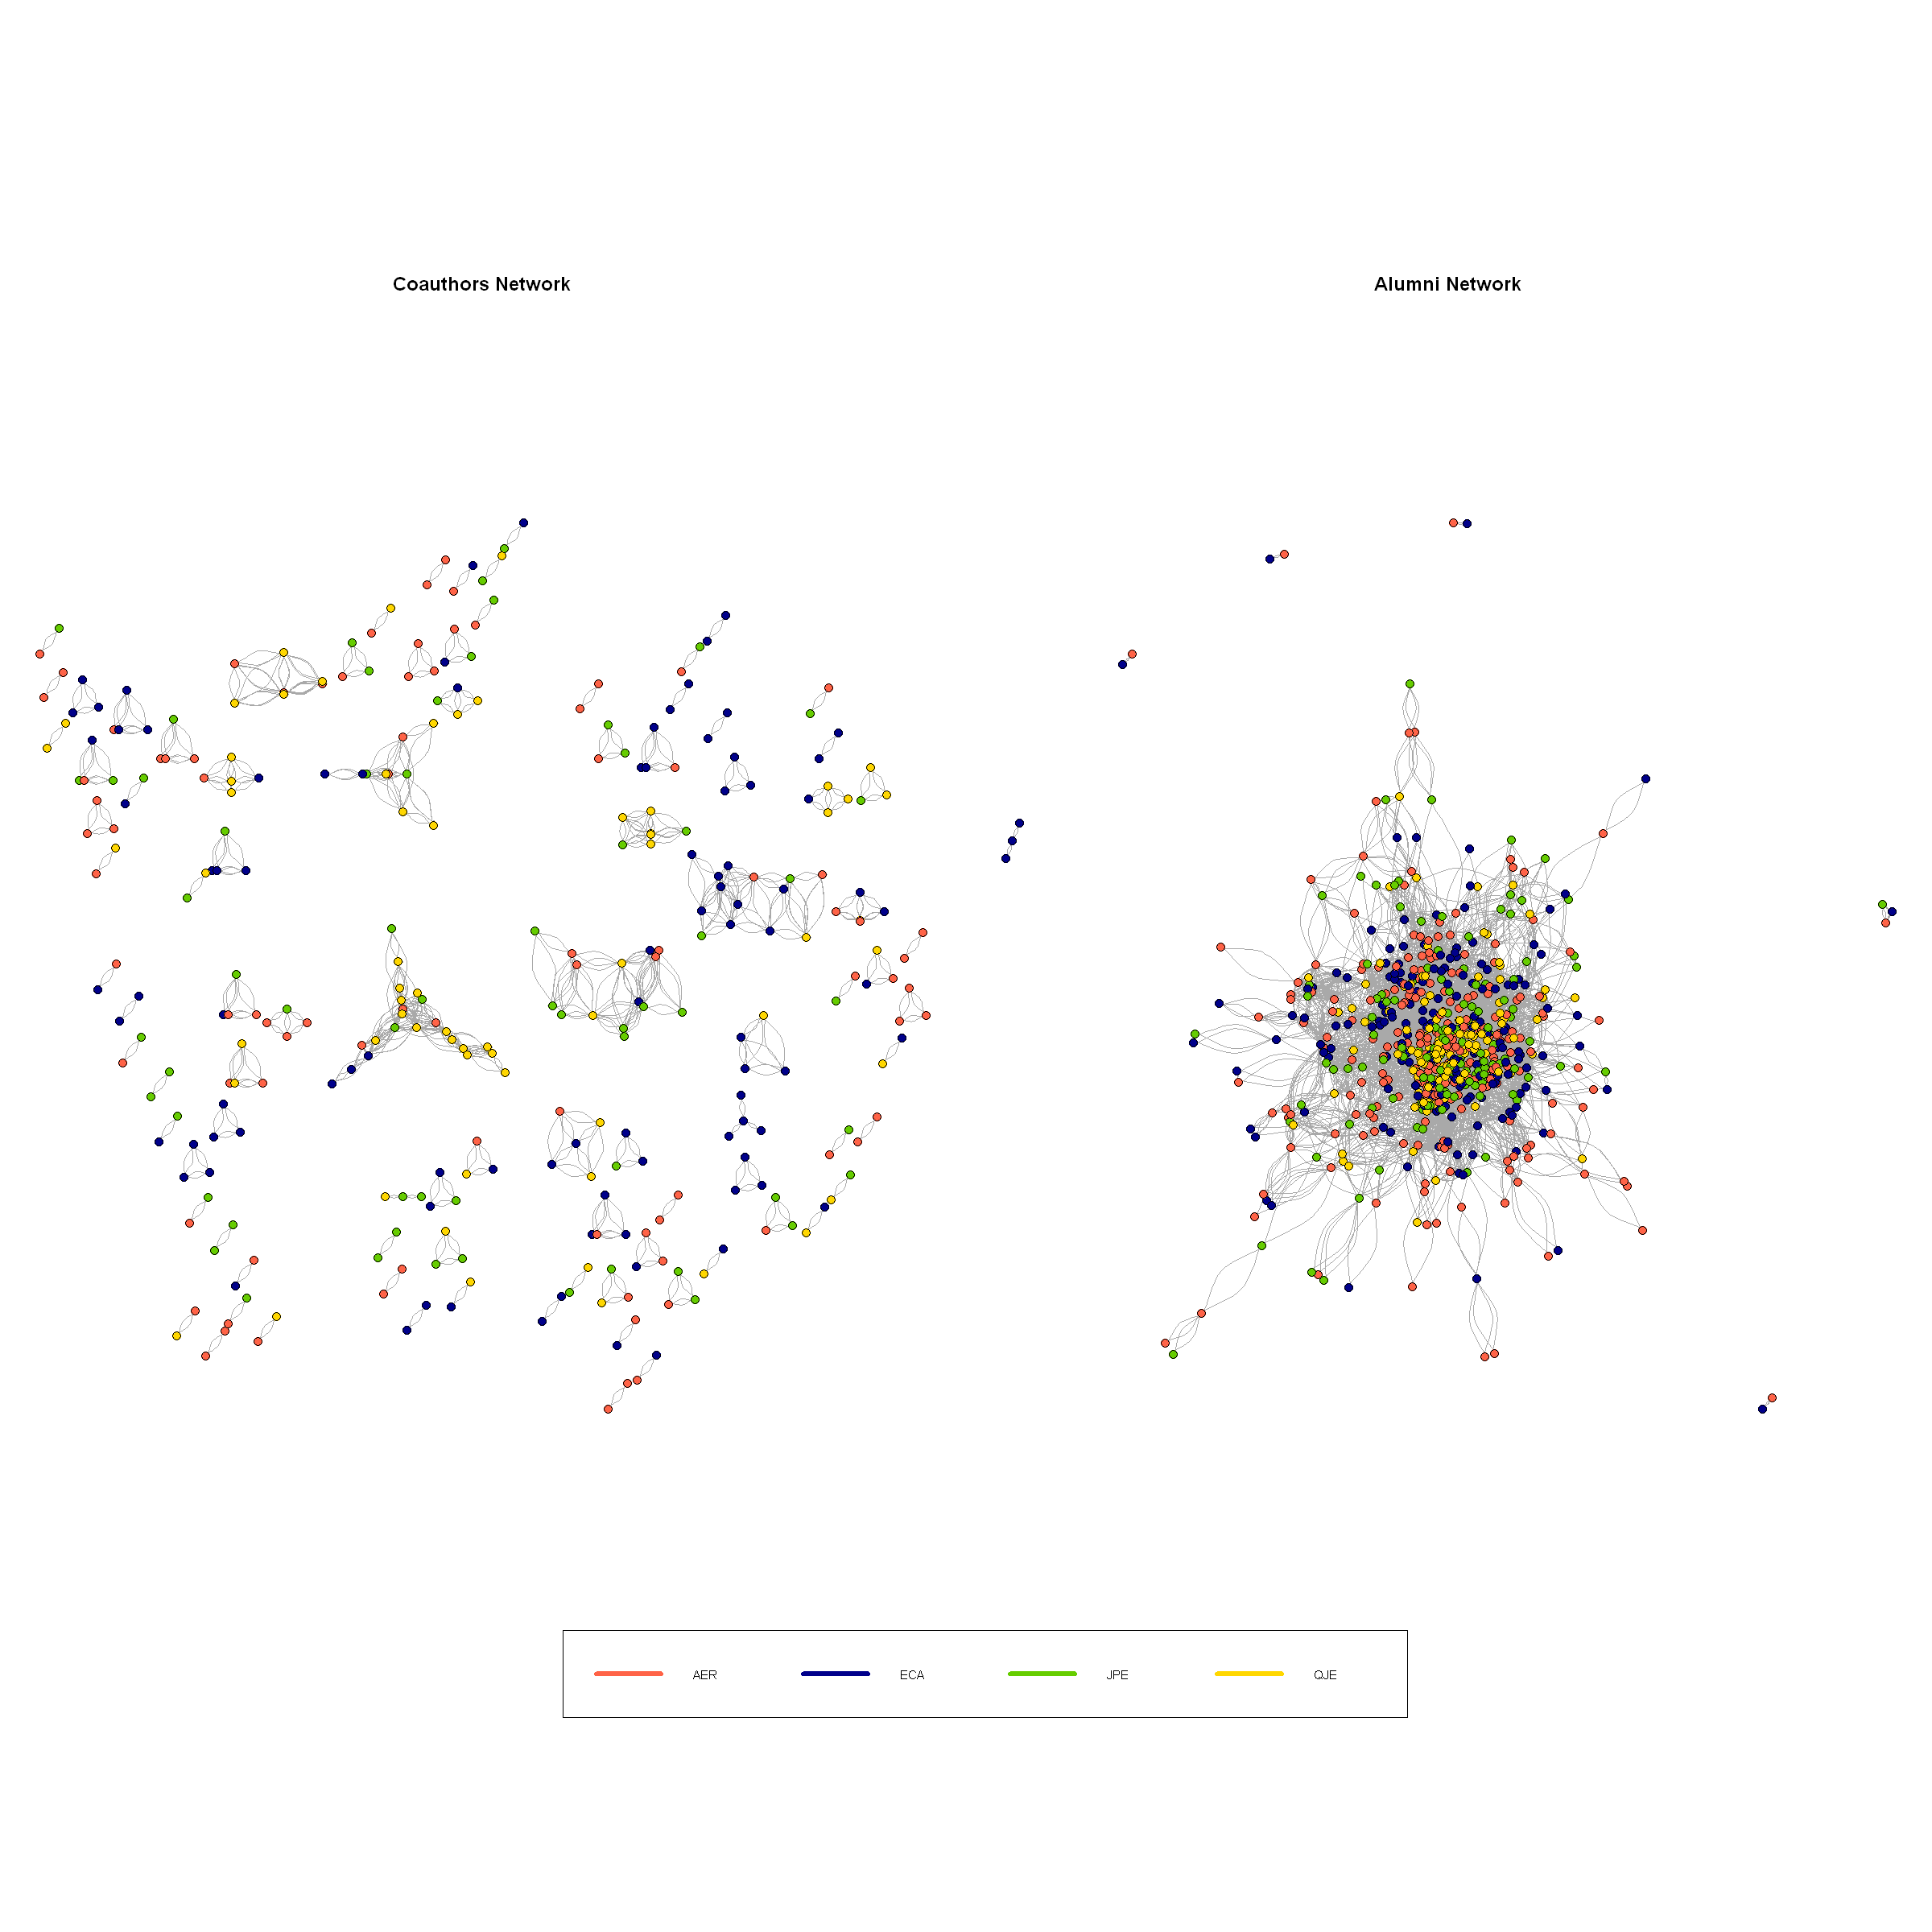

In [12]:
options(repr.plot.width=20, repr.plot.height=20)

par(mfrow=c(1,2), mar=c(0, 0, 0, 0), oma=c(0, 0, 0, 0))
plot(coauthors,vertex.label=NA, vertex.size= 2, layout = layout_with_mds(coauthors))
title("Coauthors Network", line = -15) 
plot(alumni,vertex.label=NA, vertex.size= 2, layout = l)
title("Alumni Network", line = -15)

legend(-2,-1.5, legend = c("AER","ECA", "JPE", "QJE"),  lwd = 5,xpd= "NA", col=colors, horiz = T,cex = 0.75)

<font size="4">
    
**Plot different graphs for each journal for the coauthors and alumni networks**

<font size="4">
    
1) Create a function to keep only nodes for one journal at a time

In [13]:
exclude_nodes <- function(original, n1,n2,n3){
    new.net <- delete.vertices(original, V(original)[V(original)$journal ==n1 | V(original)$journal ==n2 | V(original)$journal ==n3])
    new.net.iso <- which(degree(new.net)==0)
    new.net <- delete.vertices(new.net, new.net.iso)
    V(new.net)$size <- V(new.net)$lcitations*1.5
    return(new.net)
}

<font size="4">

2) Define smaller networks by journal

In [14]:
net.aer <- exclude_nodes(coauthors, 2,3,4)
net.eca <- exclude_nodes(coauthors, 1,3,4)
net.jpe <- exclude_nodes(coauthors, 1,2,4)
net.qje <- exclude_nodes(coauthors, 1,2,3)

<font size="4">
    
3) Create the side-by-side plot

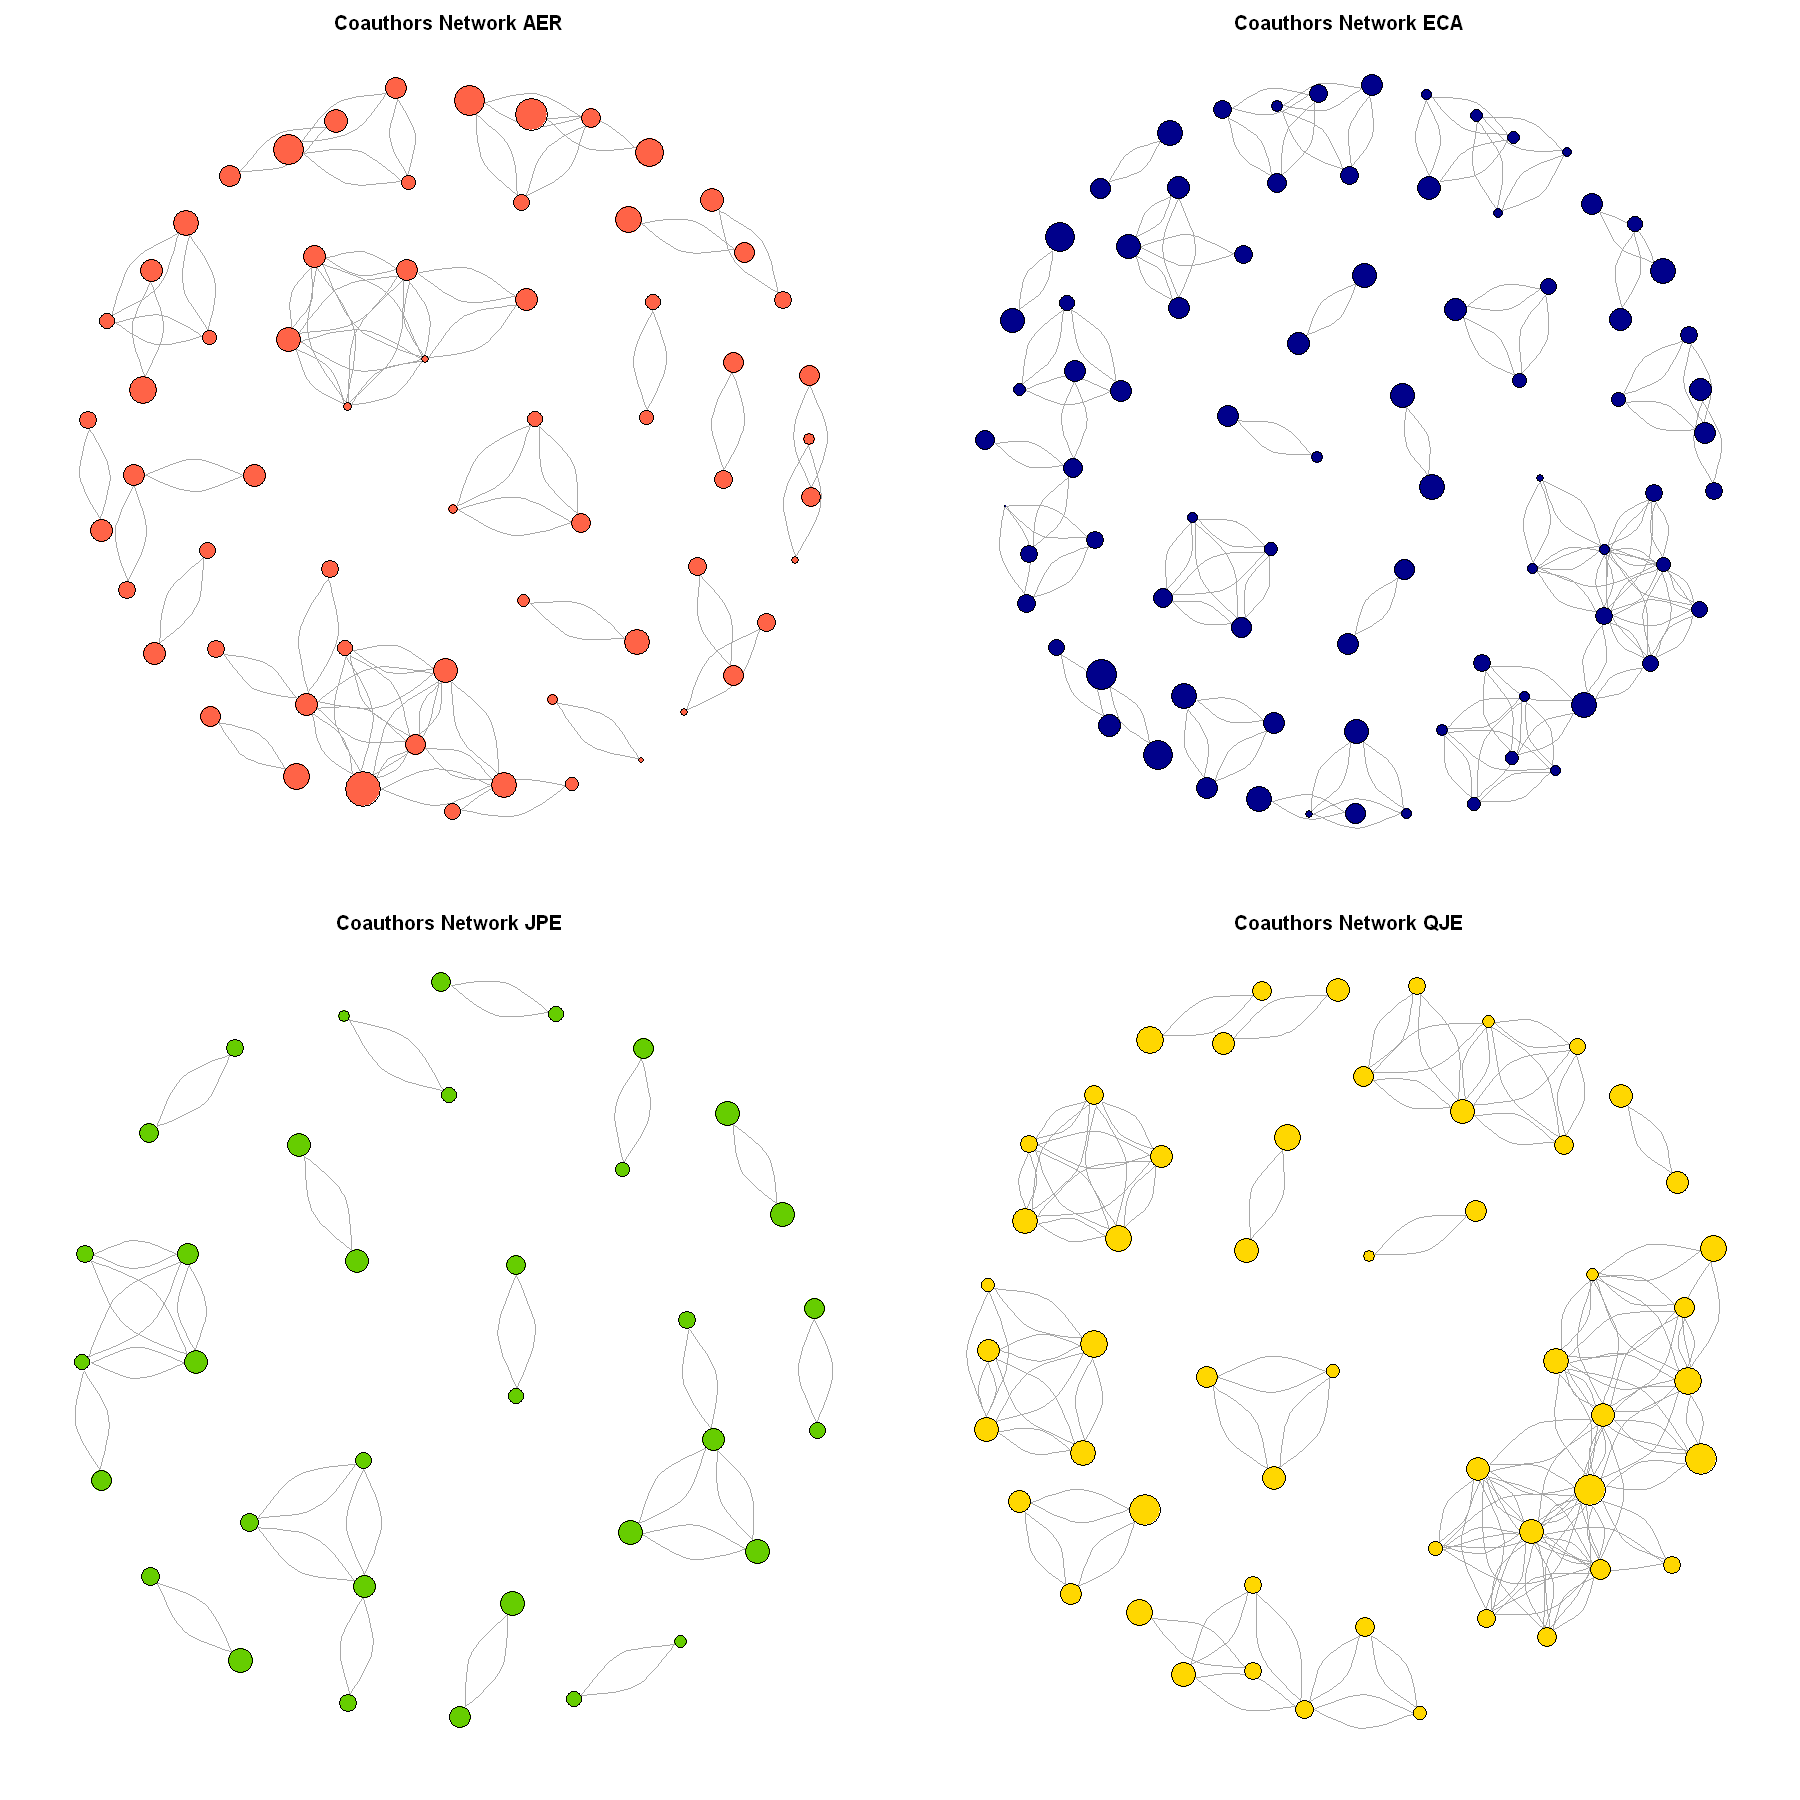

In [15]:
options(repr.plot.width=15, repr.plot.height=15)

par(mfrow=c(2,2), mar=c(2, 0, 2, 0), oma=c(0, 0, 0, 0))
plot(net.aer, vertex.label=NA, layout =  layout_with_kk(net.aer))
title("Coauthors Network AER", line = 0.5) 
plot(net.eca, vertex.label=NA, layout =  layout_with_kk(net.eca))
title("Coauthors Network ECA", line = 0.5) 
plot(net.jpe, vertex.label=NA, layout =  layout_with_kk(net.jpe))
title("Coauthors Network JPE", line = 0.5) 
plot(net.qje, vertex.label=NA, layout =  layout_with_kk(net.qje))
title("Coauthors Network QJE", line = 0.5) 

<font size="4">
    
4) Same process for alumni network

In [16]:
net.aer.a <- exclude_nodes(alumni, 2,3,4)
net.eca.a <- exclude_nodes(alumni, 1,3,4)
net.jpe.a <- exclude_nodes(alumni, 1,2,4)
net.qje.a <- exclude_nodes(alumni, 1,2,3)

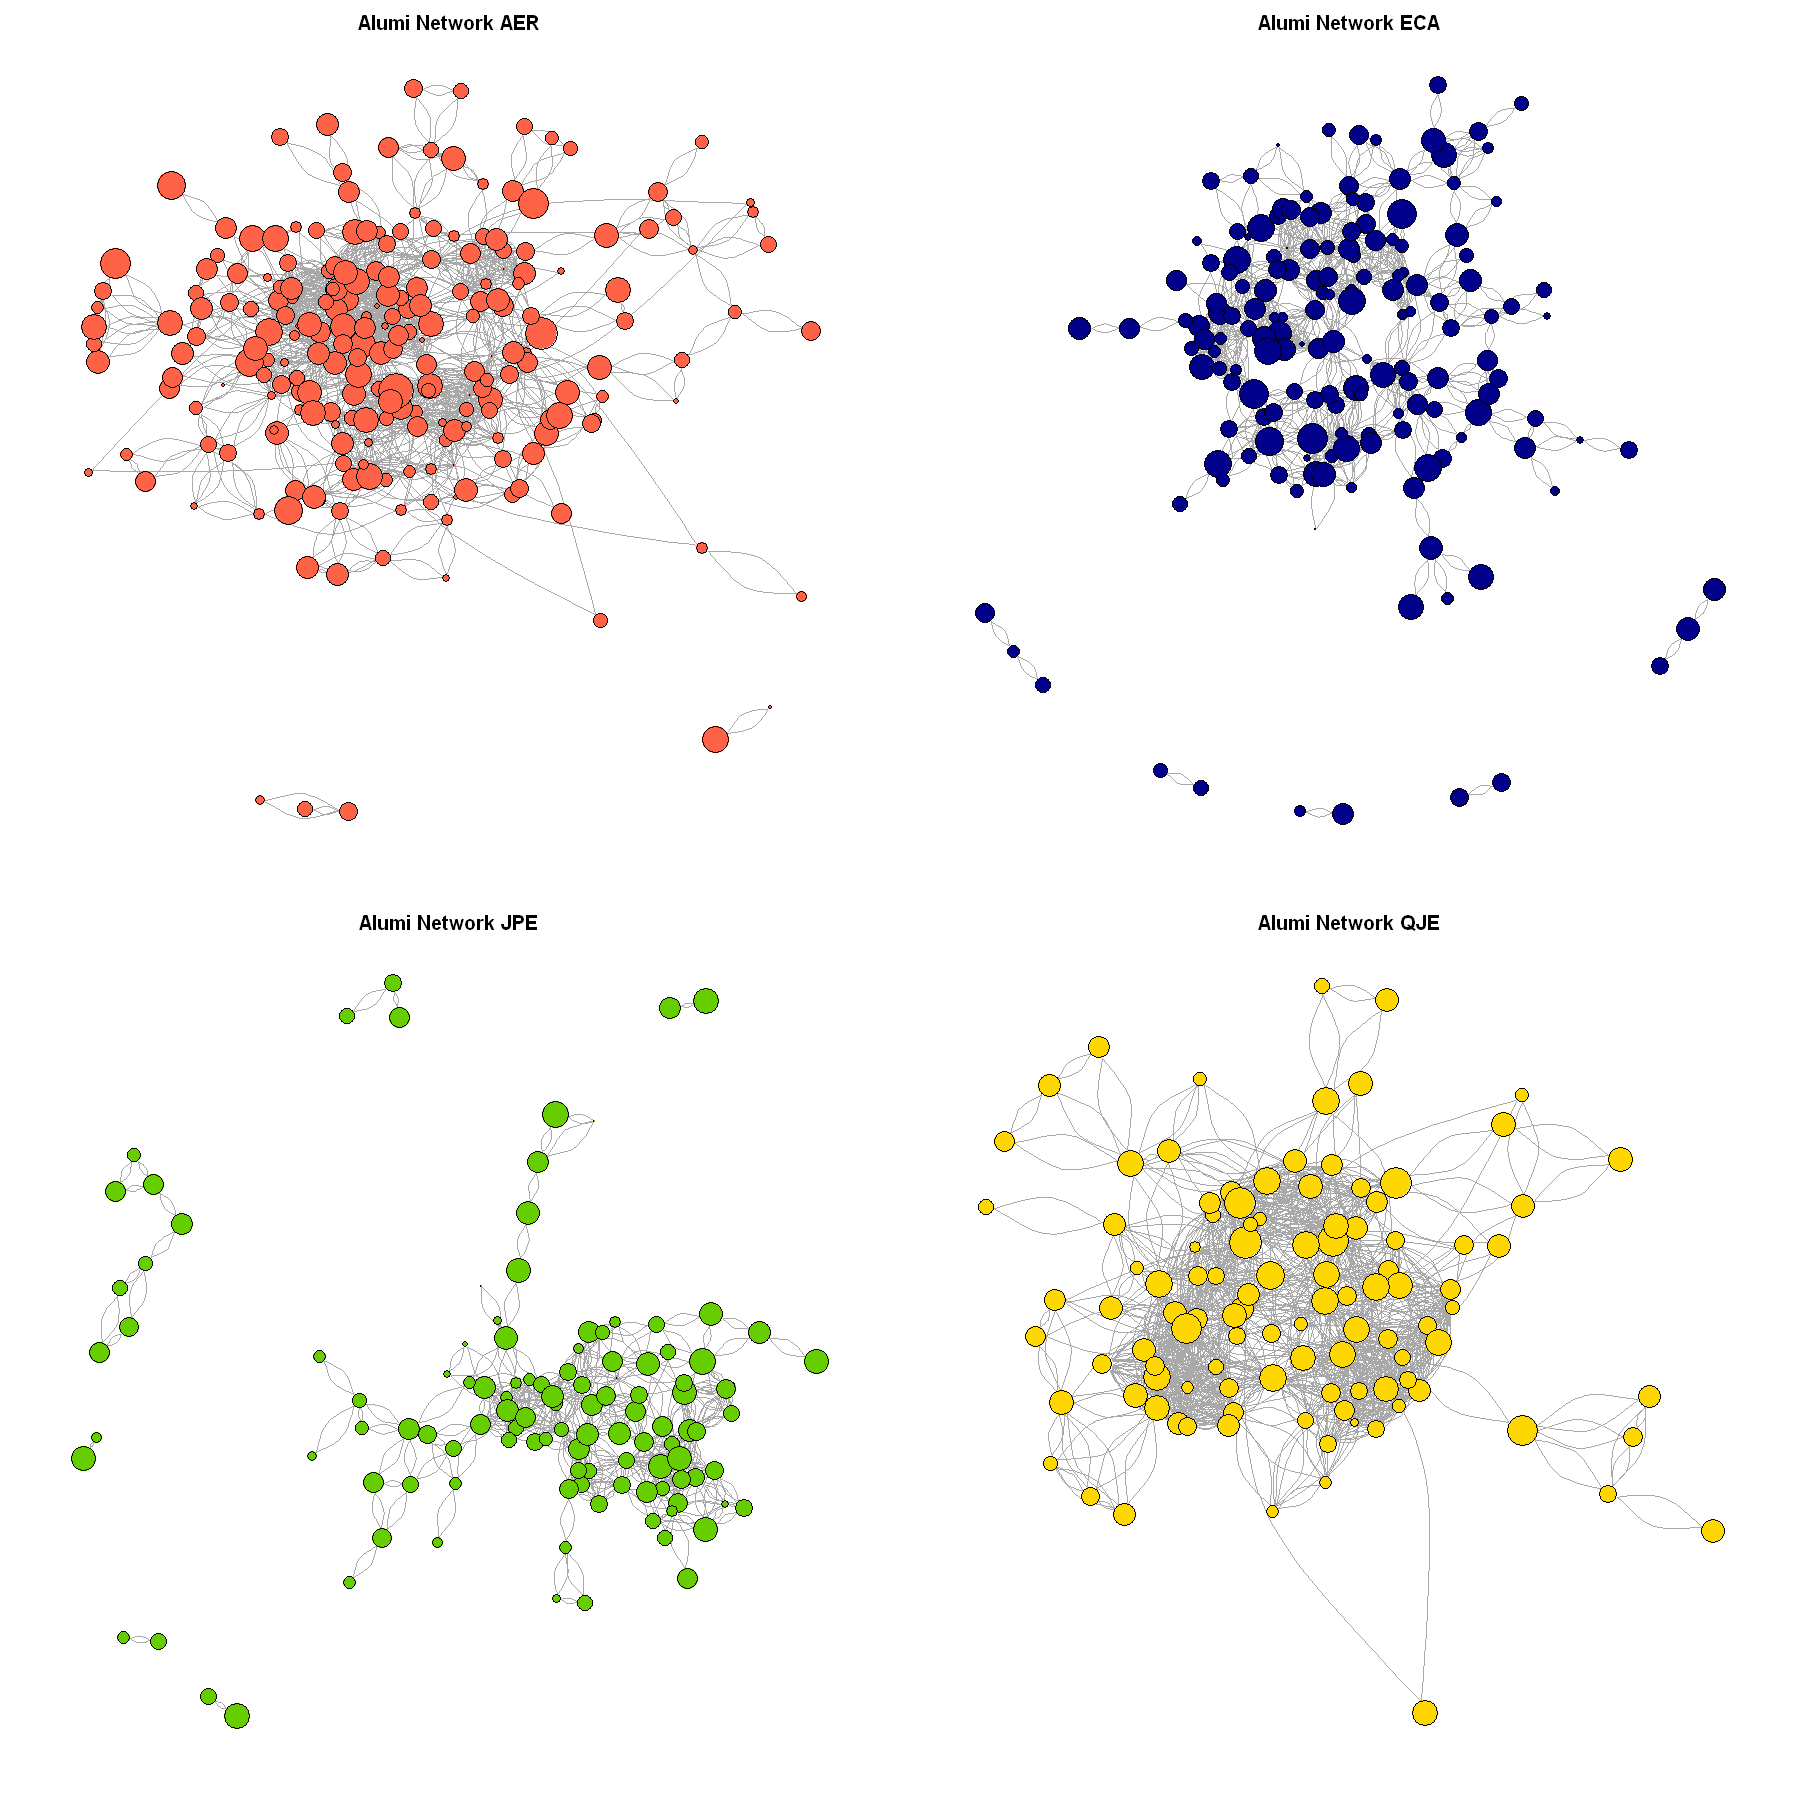

In [17]:
options(repr.plot.width=15, repr.plot.height=15)
par(mfrow=c(2,2), mar=c(2, 0, 2, 0), oma=c(0, 0, 0, 0))
plot(net.aer.a, vertex.label=NA, layout =  layout_with_kk(net.aer.a))
title("Alumi Network AER", line = 0.5) 
plot(net.eca.a, vertex.label=NA, layout =  layout_with_kk(net.eca.a))
title("Alumi Network ECA", line = 0.5) 
plot(net.jpe.a, vertex.label=NA, layout =  layout_with_kk(net.jpe.a))
title("Alumi Network JPE", line = 0.5) 
plot(net.qje.a, vertex.label=NA, layout =  layout_with_kk(net.qje.a))
title("Alumi Network QJE", line = 0.5) 

<font size="4">
    
**Construct Multilayer Visualization**

<font size="4">
  
    
- The previous network visualizations are all constructed with ```igraph```. The platform ```muxviz``` (http://muxviz.net/index.php), offers powerful tools to visualize and perform multilayer network analysis.
    
    
    
- MuxViz is based on R and Octave. Its installation requires local copies of R, Rtools, Octave and Java.
    
    
    
- The following is a plot of the multiplex network form by the alumni and coauthors connections.
    
    

![alt text](multilayer.png "Title")

<span style="color:darkblue">
    
### 2.3 Multilayer Network Statistics Using ```muxviz``` 

<font size="4">
    
**Correlation Analysis:**
    
- Similar to what happens in standard statistics, when going from monolayer to multilayer network systems, it is relevant to calculate statistics summarizing the strength of the dependence between the network structures. Given the complexity of these objects, there are different aspects that can be consider when measuring correlation. Some important metrics are:
    
1. *Mean global node overlapping:* measures the fraction of node which are common to all layers (i.e., non-isolated).
    
2. *Mean global edge overlapping:* measures the fraction of edges which are common to all layers. 
    
3. *Inter-layer assortativity (Pearson):* calculates the Pearson correlation coefficient between the degree of the nodes across different layers.

4. *Inter-layer similarity by shortest-path distance between nodes:* calculate the shortest path between the all pairs of nodes in each layer separately. The resulting distance matrices are compared by using the Frobenius distance. 
    
<font>

<font size="4">
    
⚠️**Empirical Fining:**

The coauthors and alumni networks present a relatively high correlation in terms of non-isolated nodes and degree similarity. The results of the mean global node overlapping and the inter-layer assortativity are 0.458 and 0.35. However, when the correlation analysis is performed based on edges in common or similar shortest paths, the resulting correlation values are low. The mean global edge overlapping and inter-layer similarity by shortest-path distance measures show correlations of 0.025 and approximately zero respectively.

<font>

<font size="4">
    
**Centrality Measures:**
    
The previous measures of centrality can be extended to the Multilayer case by considering the normalized version of 
    
$$\widetilde{\mathbf{W}} = \sum_{m=1}^{M}\mathbf{W}_{m}$$
    
where $\mathbf{W}_{m}$ is the adjacency matrix of the layer $m$. Therefore, the matrix $\widetilde{\mathbf{W}}$ considers all possible edges defined between two nodes in the multilayer network. 
    
- The multiltiplexity centrality is defined as the proportion of layers in which is node is present. Because in this case we only have two layer, the multiplexity centrality is not interesting and it is excluded from the analysis.
    
- The following two plots show the top 5 most central articles in economics defined by degree and eigenvector centrality.
    
    
⚠️**Empirical Fining:**

![alt text](degree.png "Title")

![alt text](eigenvector.png "Title")

<font size="4">

**Most central articles by degree:**
    
- Article 538: "Moving to Opportunity in Boston: Early Results of a Randomized Mobility Experiment" by Lawrence F. Katz, Jeffrey R. Kling and Jeffrey B. Liebman.
    
    
- Article 253: "Vouchers for Private Schooling in Colombia: Evidence from a Randomized Natural Experiment" by By Joshua Angrist, Eric Bettinger, Erik Bloom, Elizabeth King, Michael Kremer
    
    
**Most central articles by eigenvector:**


- Article 409: "Information Technology, Workplace Organization, and the Demand for Skilled Labor: Firm-Level Evidence" by Timothy F. Bresnahan, Erik Brynjolfsson and Lorin M. Hitt

    
- Article 639: "Measuring Trust" by Edward L. Glaeser, David I. Laibson, Jose A. Scheinkman and Christine L. Soutter


<font size="4">

**Path and distances:**
    
Finally, the next two plots present the mean path length and the diameter for the two layers of our empirical multilayer network (see ```pres_4``` for definitions of paths and diameters in the monolayer case).

![alt text](path.png "Title")

![alt text](diameter.png "Title")